<a href="https://colab.research.google.com/github/SaharshGit/RoaDo-DataAnalystTask/blob/main/data_cleaning%26Analysis_scripts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NYC Taxi and Limousine Commission (TLC) -> Yellow Taxi Trip Record 2025 data

you can download data from original sources if not possible use this link
https://drive.google.com/drive/folders/1t05bw0aHt_S6M8LbUiXfKW6LzCDgJ_eK?usp=sharing


installing necessary libraries

In [ ]:
!pip install pandas pyarrow

importing required libraries

In [ ]:
import pandas as pd

importing data as pandas Dataframe

In [ ]:
df = pd.read_parquet("/content/yellow_tripdata_2025-01.parquet")

In [ ]:
# Verify the data loaded correctly
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
2776650,2,2025-01-30 16:10:43,2025-01-30 16:17:39,1.0,0.84,1.0,N,224,164,2,7.9,2.50,0.5,0.00,0.00,1.0,15.15,2.5,0.00,0.75
901388,2,2025-01-11 10:45:50,2025-01-11 11:02:14,1.0,3.32,1.0,N,141,50,4,-19.1,0.00,-0.5,0.00,0.00,-1.0,-23.85,-2.5,0.00,0.00
606573,1,2025-01-08 11:17:56,2025-01-08 11:27:23,1.0,1.00,1.0,N,162,186,1,10.0,3.25,0.5,2.95,0.00,1.0,17.70,2.5,0.00,0.75
157831,2,2025-01-03 01:25:28,2025-01-03 02:00:22,2.0,18.37,2.0,N,132,230,2,70.0,0.00,0.5,0.00,6.94,1.0,82.69,2.5,1.75,0.00
91148,1,2025-01-02 11:36:35,2025-01-02 11:58:30,1.0,1.80,1.0,N,186,43,1,18.4,2.50,0.5,4.50,0.00,1.0,26.90,2.5,0.00,0.00


## Data Cleaning

In [ ]:
# Check data types and for null values
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3475226 entries, 0 to 3475225
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee

In [ ]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,540149
trip_distance,0
RatecodeID,540149
store_and_fwd_flag,540149
PULocationID,0
DOLocationID,0
payment_type,0


Columns - [Airport_fee, congestion_surcharge, store_and_fwd_flag, RatecodeID, passenger_count] have null values.  

Each of these column have exactly 540149 null values.







In [ ]:
df.shape

(3475226, 20)

Total rows - 3475226

rows with null values - 540149

it is approx 15% of data. so i am going to fill with logical assumptions

columns [Airport_fee] and [congestion_surcharge] having null values can indicate that there were no such charges applied for that trip, we can fill these nulls with 0.

In [ ]:
df['congestion_surcharge'].fillna(0, inplace=True)
df['Airport_fee'].fillna(0, inplace=True)

/tmp/ipython-input-3141660353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)
/tmp/ipython-input-3141660353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

we will replace [passenger_count] column with median of its column value

In [ ]:
median_passenger_count = df['passenger_count'].median()
df['passenger_count'].fillna(median_passenger_count, inplace=True)

/tmp/ipython-input-22414744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(median_passenger_count, inplace=True)


RatecodeID (float64): A numeric code for the fare type applied to the trip. its RatecodeID -> 1 is used for standard rate we will replace null with this value.

In [ ]:
df['RatecodeID'].fillna(1, inplace=True)

/tmp/ipython-input-427974952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(1, inplace=True)


The [store_and_fwd_flag] indicates whether the trip data was sent live or stored in the vehicle's memory first (e.g., due to poor connectivity).

'Y': Yes, the data was stored and then forwarded.

'N': No, the data was sent in real-time.

A null value here likely means the information wasn't recorded, but in most cases, it's safe to assume the trip was sent in real-time like a standard trip.

In [ ]:
df['store_and_fwd_flag'].fillna('N', inplace=True)

/tmp/ipython-input-3425283548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna('N', inplace=True)


### Missing and null values are handled now

In [ ]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [ ]:
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59              1.0   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13              1.0   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01              1.0   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01              3.0   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.60         1.0                  N           229           237   
1           0.50         1.0                  N           236           237   
2           0.60         1.0                  N           141           141   
3           0.52         1.0                  N           244           244   
4           0.66         1.0                  N           244           116   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


### Correcting Data Types

passenger_count and RatecodeID: These are float64 but should be integers.

payment_type, VendorID, PULocationID, DOLocationID: These are numbers but represent categories.

In [ ]:
# Converting float columns to integers
df['passenger_count'] = df['passenger_count'].astype('int64')
df['RatecodeID'] = df['RatecodeID'].astype('int64')

# Converting relevant integer columns to categorical type
df['VendorID'] = df['VendorID'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')

filtering out rows with illogical values

In [ ]:
# Check for trips with zero or negative distance
print(f"Trips with distance <= 0: {(df['trip_distance'] <= 0).sum()}")

# Check for trips with negative fare amount
print(f"Trips with fare_amount < 0: {(df['fare_amount'] < 0).sum()}")

# Filtering out these illogical trips
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] >= 0)]

Trips with distance <= 0: 90893
Trips with fare_amount < 0: 144118


In [ ]:
# Check passenger counts
print(df['passenger_count'].value_counts())

# Filtering for a reasonable range of passengers (e.g 1 to 6)
df = df[(df['passenger_count']>0) & (df['passenger_count'])<=6]


passenger_count
1    2664820
2     393994
3      87839
4      54800
0      23655
5      17627
6      11921
8          6
9          3
7          1
Name: count, dtype: int64


The dropoff time must be after the pickup time

In [ ]:
# Removing trips where dropoff is before or at the same time as pickup
df = df[df['tpep_dropoff_datetime'] > df['tpep_pickup_datetime']]

### Feature Engineering & Outlier Analysis

In [ ]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

print(df['trip_duration'].describe())

count    3.253310e+06
mean     1.513639e+01
std      2.728979e+01
min      1.666667e-02
25%      7.333333e+00
50%      1.170000e+01
75%      1.833333e+01
max      5.626317e+03
Name: trip_duration, dtype: float64


min duration is 1.66e-02 minutes, which is about 1 second.

max duration is 5.62e+03 minutes, which is over 93 hours

we should remove shuch outliers

Defining Logical Boundaries

Minimum Duration: 1 minute

Maximum Duration: 24 hours (1440 minutes)

In [ ]:
# number of rows before filtering
print(f"Original number of rows: {len(df)}")

# Filtering DataFrame to keep only trips with a logical duration
df = df[(df['trip_duration'] >= 1) & (df['trip_duration'] <= 1440)]

# number of rows after filtering
print(f"Number of rows after cleaning: {len(df)}")

Original number of rows: 3253310
Number of rows after cleaning: 3243767


In [ ]:
print(df['trip_duration'].describe())

count    3.243767e+06
mean     1.516868e+01
std      2.664950e+01
min      1.000000e+00
25%      7.366667e+00
50%      1.171667e+01
75%      1.836667e+01
max      1.439867e+03
Name: trip_duration, dtype: float64


### Feature Engineering

In [ ]:
# Extracting time-based features from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculate speed in miles per hour (MPH)
df['speed_mph'] = df['trip_distance'] / (df['trip_duration'] / 60)

# Calculate tip percentage for credit card payments
# Filter for credit card payments (payment_type == 1) because for cash payment (payment_type ==2) tip is not recorded
credit_card_trips = df['payment_type'] == 1
df.loc[credit_card_trips, 'tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
df['tip_percentage'].fillna(0, inplace=True) # Fill non-credit card trips with 0

/tmp/ipython-input-2501740597.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tip_percentage'].fillna(0, inplace=True) # Fill non-credit card trips with 0


### Final Cleaned, Transformed and Validated data

In [ ]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,trip_duration,pickup_hour,pickup_day_of_week,speed_mph,tip_percentage
2252278,2,2025-01-25 01:03:43,2025-01-25 01:09:42,1,0.70,1,N,79,79,1,...,1.0,15.54,2.5,0.00,0.75,5.983333,1,Saturday,7.019499,35.972222
1383126,2,2025-01-16 08:49:57,2025-01-16 09:48:45,2,18.34,2,N,132,152,1,...,1.0,84.20,0.0,1.75,0.00,58.800000,8,Thursday,18.714286,5.728571
1490429,2,2025-01-17 07:39:56,2025-01-17 08:00:24,1,2.03,1,N,151,263,1,...,1.0,23.88,0.0,0.00,0.00,20.466667,7,Friday,5.951140,21.630435
2036400,2,2025-01-23 08:29:01,2025-01-23 08:41:51,3,1.83,1,N,162,140,1,...,1.0,21.90,2.5,0.00,0.75,12.833333,8,Thursday,8.555844,27.037037
1098492,2,2025-01-13 12:07:12,2025-01-13 12:48:15,2,16.52,1,N,132,17,1,...,1.0,71.95,0.0,1.75,0.00,41.050000,12,Monday,24.146163,2.998501


## Analysis

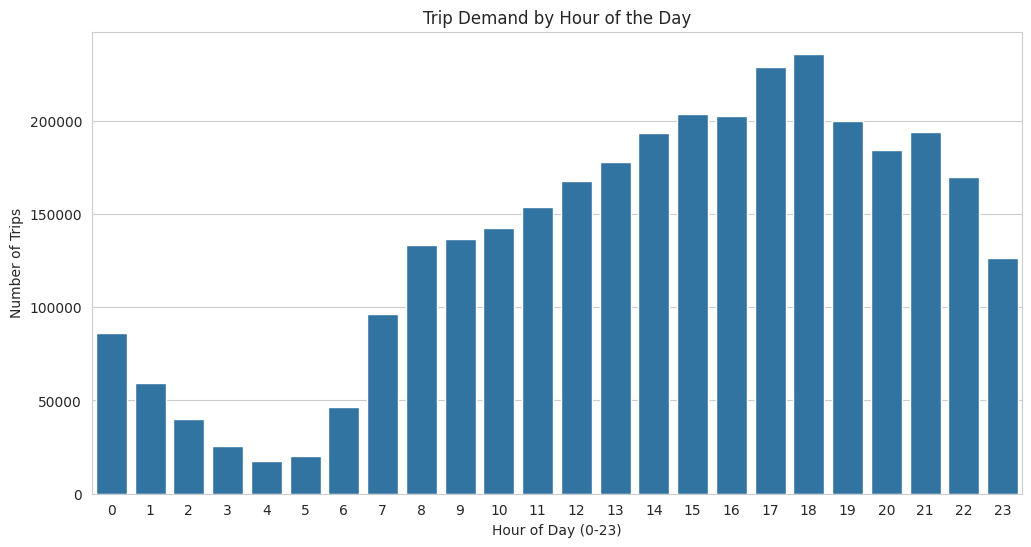

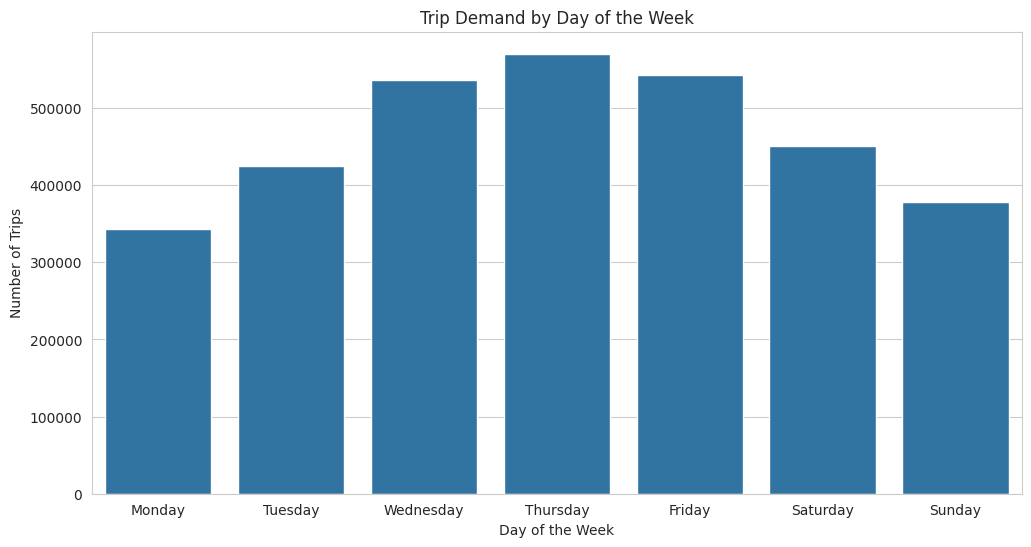

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set_style("whitegrid")

# Analyze demand by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_hour')
plt.title('Trip Demand by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.show()

# Analyze demand by day of the week
plt.figure(figsize=(12, 6))
# Order the days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='pickup_day_of_week', order=day_order)
plt.title('Trip Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

we will import the pickup zone csv file to get atual location name from PULocationID

In [ ]:
zones_df = pd.read_csv("/content/taxi_zone_lookup.csv")

In [ ]:
# Assuming you have loaded the taxi zone lookup file into a DataFrame called `zones_df`

# Find the top 10 most profitable pickup zones
profitable_zones = df.groupby('PULocationID')['total_amount'].mean().nlargest(10).reset_index()

# Merge with zones_df to get the actual names
merged_zones = profitable_zones.merge(zones_df, left_on='PULocationID', right_on='LocationID')

print("Top 10 Most Profitable Pickup Zones (by Average Fare):")
print(merged_zones[['Zone', 'total_amount']])

Top 10 Most Profitable Pickup Zones (by Average Fare):
                                  Zone  total_amount
0                       Newark Airport    100.790000
1                        Arden Heights     96.670000
2  Breezy Point/Fort Tilden/Riis Beach     93.190000
3                        Rikers Island     84.470000
4                       Outside of NYC     84.451069
5                    Rossville/Woodrow     81.886667
6         Flushing Meadows-Corona Park     81.523348
7                          JFK Airport     81.209424
8                    LaGuardia Airport     76.849616
9                         Astoria Park     65.935789


In [ ]:
# Count the number of trips for each pickup location ID
busiest_zones = df['PULocationID'].value_counts().nlargest(10).reset_index()
busiest_zones.columns = ['PULocationID', 'trip_count'] # Renamed columns for clarity

# Merge with the zones lookup table to get the actual zone names
busiest_zones_with_names = busiest_zones.merge(zones_df, left_on='PULocationID', right_on='LocationID')

print("Top 10 Busiest Pickup Zones (by Number of Trips):")
print(busiest_zones_with_names[['Zone', 'Borough', 'trip_count']])

Top 10 Busiest Pickup Zones (by Number of Trips):
                           Zone    Borough  trip_count
0                Midtown Center  Manhattan      161066
1         Upper East Side South  Manhattan      157718
2         Upper East Side North  Manhattan      149491
3                   JFK Airport     Queens      133529
4     Times Sq/Theatre District  Manhattan      118045
5  Penn Station/Madison Sq West  Manhattan      113977
6                  Midtown East  Manhattan      112420
7           Lincoln Square East  Manhattan      105840
8         Upper West Side South  Manhattan       91713
9                 Midtown North  Manhattan       91372


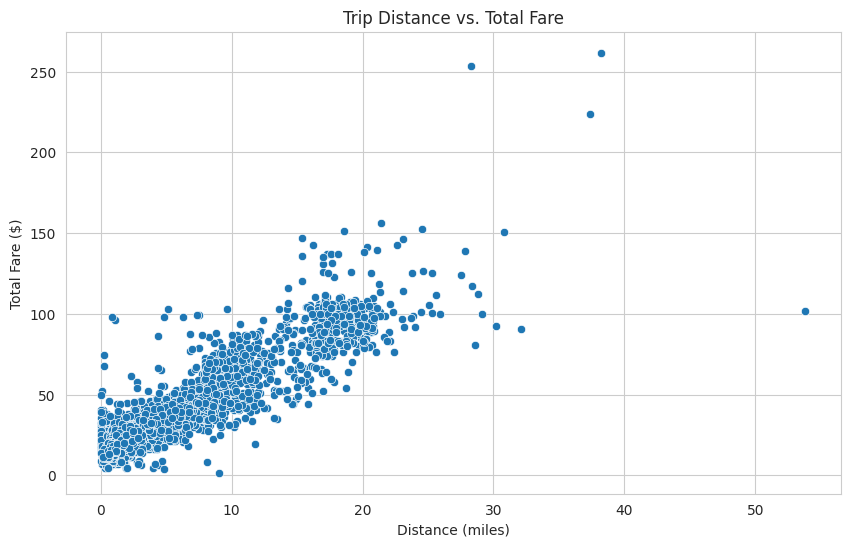

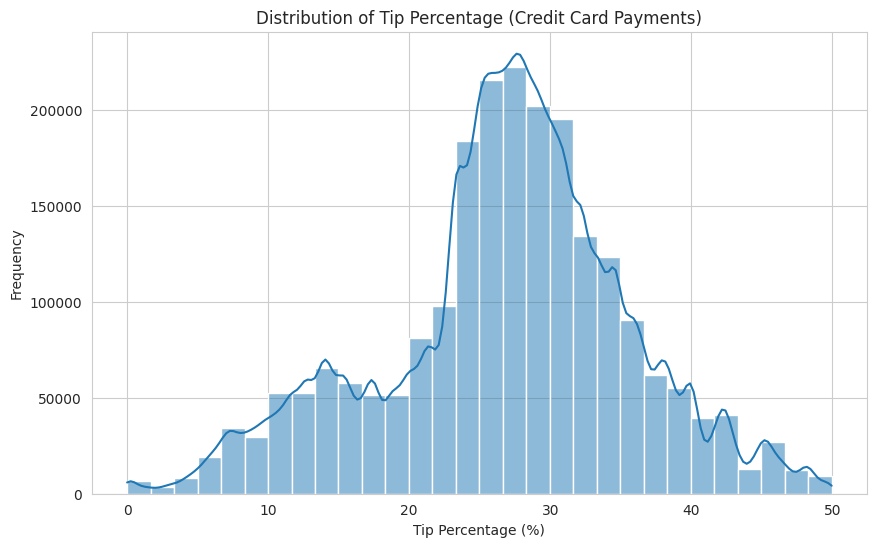

In [ ]:
# Analyzing relationship between distance and fare
plt.figure(figsize=(10, 6))
# Using a sample of 10,000 to prevent the plot from being too crowded
sns.scatterplot(data=df.sample(10000), x='trip_distance', y='total_amount')
plt.title('Trip Distance vs. Total Fare')
plt.xlabel('Distance (miles)')
plt.ylabel('Total Fare ($)')
plt.show()


# Analyzing tip percentage distribution (only for credit card trips where a tip was given)
plt.figure(figsize=(10, 6))
sns.histplot(df[(df['tip_percentage'] > 0) & (df['tip_percentage'] < 50)]['tip_percentage'], bins=30, kde=True)
plt.title('Distribution of Tip Percentage (Credit Card Payments)')
plt.xlabel('Tip Percentage (%)')
plt.ylabel('Frequency')
plt.show()